In [1]:
import numpy as np
import tensorflow as tf

from sionna.rt import load_scene, Transmitter, Receiver, PlanarArray
import matplotlib.pyplot as plt

2025-06-13 19:54:56.921396: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-13 19:54:56.967872: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-13 19:54:57.844178: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2025-06-13 19:54:59.414386: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at htt

In [10]:
scene = load_scene("/home/kato/AVR/AcoustiX/custom_scene/box_scene/box_scene.xml")

In [11]:
for i, obj in enumerate(scene.objects.values()):
    print(f"{i}: {obj.name}: {obj.radio_material.name}")
    if i > 10:
        break

0: Cube: itu_concrete


In [12]:
scene.tx_array = PlanarArray(num_rows=1, num_cols=1, vertical_spacing=0.1, horizontal_spacing=0.1, pattern="iso", polarization="V")
scene.rx_array = PlanarArray(num_rows=1, num_cols=1, vertical_spacing=0.1, horizontal_spacing=0.1, pattern="iso", polarization="cross")

In [13]:
tx = Transmitter(name="tx", position=[ 1., -2.3, 1.5])
scene.add(tx)

rx = Receiver(name="rx", position=[ 1.01777042, -0.26400299,  0.08675679], orientation=[0,0,0])    
scene.add(rx)

In [14]:
cm = scene.coverage_map()

In [15]:
scene.preview(coverage_map=cm)

Renderer(camera=PerspectiveCamera(aspect=1.31, children=(DirectionalLight(intensity=0.25, position=(0.0, 0.0, …

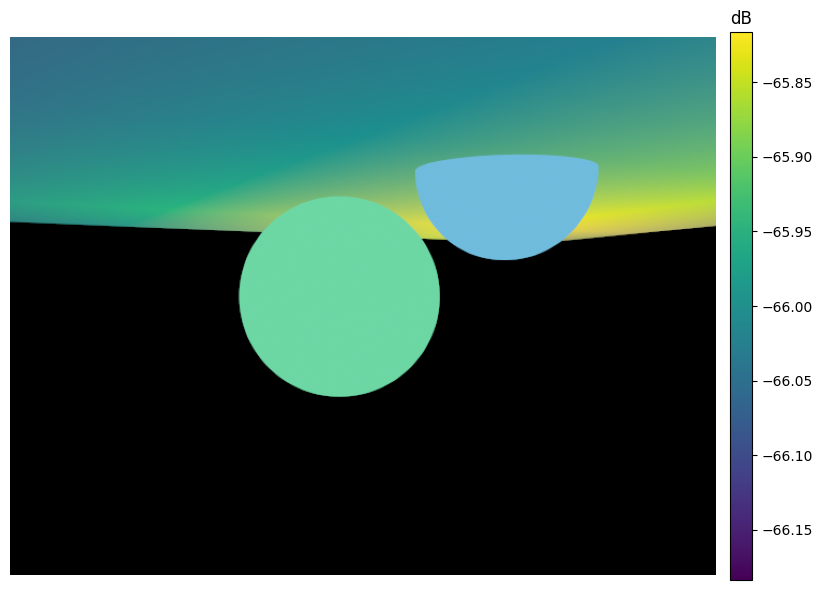

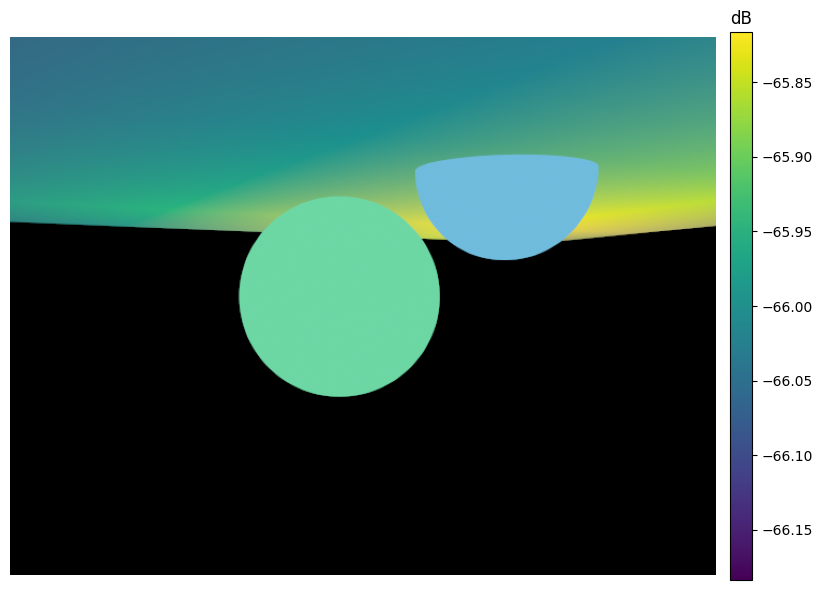

In [16]:
scene.render("preview", coverage_map=cm)

In [17]:
paths = scene.compute_paths()

In [18]:
tau, a = paths.cir()

In [19]:
tau.shape

TensorShape([1, 1, 2, 1, 1, 63, 1])

In [20]:
a.shape

TensorShape([1, 1, 1, 63])

/home/kato/AVR/env_acoustix/lib/python3.10/site-packages/tensorflow/python/framework/ops.py:1041: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(self._numpy())
/home/kato/AVR/env_acoustix/lib/python3.10/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


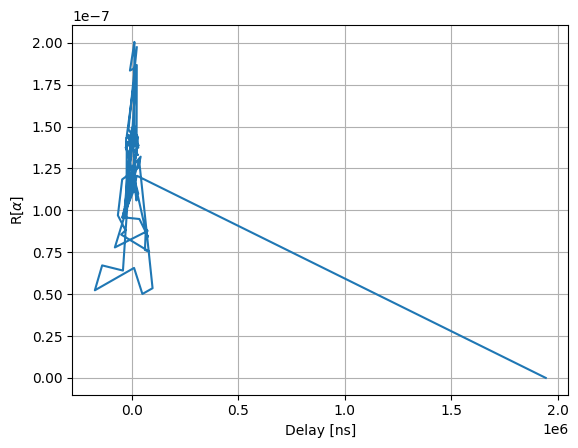

In [21]:
# tau: [1, 1, 16, 1, 16, 62, 1]
# 適切に squeeze & slice
delay = tau[0, 0, 0, 0, 0, :, 0] * 1e9  # [62]
amplitude = np.abs(a[0, 0, 0, :])      # [62]

plt.figure()
plt.plot(delay, amplitude)
plt.xlabel("Delay [ns]")
plt.ylabel("R[$\\alpha$]")
plt.grid(True)
plt.show()


In [22]:
scene.preview(paths=paths)

Renderer(camera=PerspectiveCamera(aspect=1.31, children=(DirectionalLight(intensity=0.25, matrixWorldNeedsUpda…

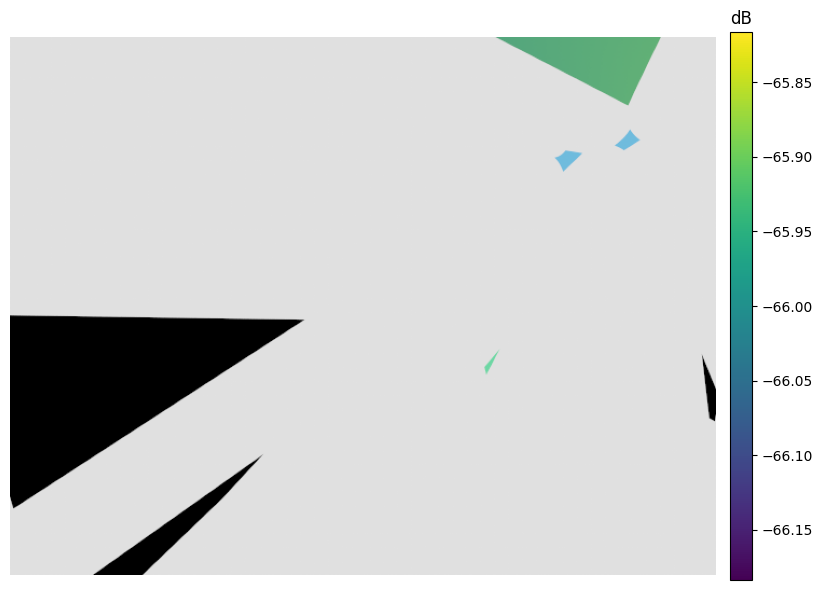

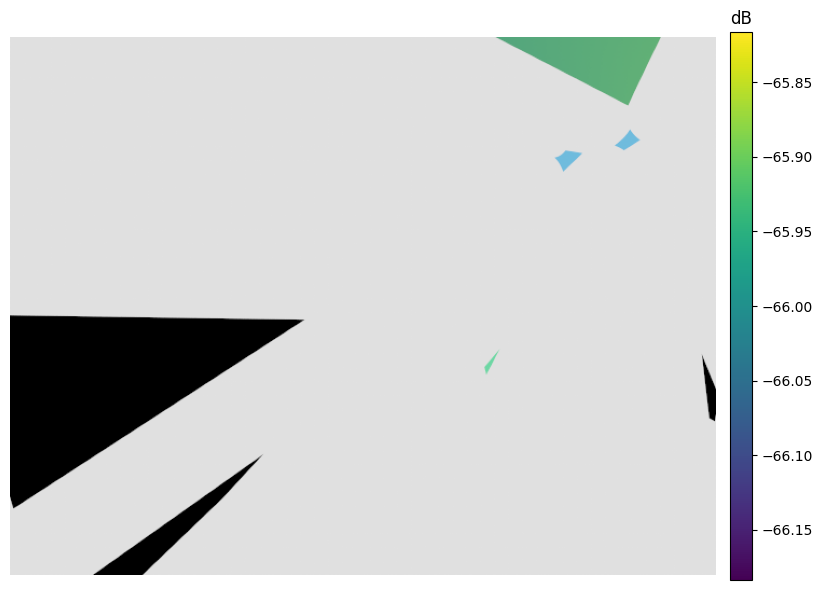

In [23]:
scene.render("preview", paths=paths, coverage_map=cm)